# **Fruit Classification - Deep Learning Approach**

**Supermarkets** around the world need to **cluster different fruits** to put them into their right racks and tag them with their right **price**. It is not easy especially nowadays when there are a lot of varieties of each fruit which differ very slightly with each other that even human eye can be confused. 

To solve this problem, machine learning and deep learning techniques can be very useful as the development in these techniques especially in the field of neural networks has been immense in the last decade. 

In this notebook, I will explore deep learning approaches which I will explore machine learning approaches in the other notebook. The dataset and problem has been taken from Kaggle. Here's the link for the same :

https://www.kaggle.com/moltean/fruits/tasks

**Approaches Explored** :-

1) Building **convolutional layers** along with maxpooling

2) Partial model with **transfer learning** approach from VGG16 and then adding some extra convolutional layers along with maxpooling

In the end, I will write what all things can be done later


I used google colab since it gives a free GPU and allow us to use the drive repository.

**Dataset Properties**

Total number of images: 82213.

Training set size: 61488 images (one fruit or vegetable per image).

Test set size: 20622 images (one fruit or vegetable per image).

Multi-fruits set size: 103 images (more than one fruit (or fruit class) per image)

Number of classes: 120 (fruits and vegetables).

Image size: 100x100 pixels.

First, I will mount my drive and use Kaggle's API to download data directly into the drive. It just takes a few secs to download around 800 MB of the fruits dataset

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/your_project_folder/'  #change dir to your project folder

In [49]:
#using kaggle api

from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"saketgarodia1","key":"c9d81a17bfe47308e791885989ee4844"}'}

In [50]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [0]:
#searching for the dataset

#Search for datasets and competitions by name
!kaggle datasets list -s fruits

Let us download the data into the drive.

In [53]:
!kaggle datasets download -d moltean/fruits -p /content/gdrive/My\ Drive/kaggle --force

100% 734M/734M [00:04<00:00, 175MB/s]
100% 734M/734M [00:04<00:00, 155MB/s]


In [12]:
!ls "/content/gdrive/My Drive/kaggle"


Test.zip  Training.zip


Now that we have downloaded the dataset, let us unzip the training and test set.

In [0]:
#unzipping training folder

!unzip -uq "/content/gdrive/My Drive/kaggle/Training.zip" -d "/content/gdrive/My Drive/kaggle"

In [0]:
#unzipping test folder

!unzip -uq "/content/gdrive/My Drive/kaggle/Test.zip" -d "/content/gdrive/My Drive/kaggle"

In [0]:
#import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

In [0]:
# Loading data and putting them into training and test sets

#locations setting for training and test datasets
train_data='/content/gdrive/My Drive/kaggle/Training'
test_data='/content/gdrive/My Drive/kaggle/Test'

#creates X_train and Y_train using file_names and folders
def get_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

X_train, Y_train, labels = get_data(train_data)
X_test, Y_test,_ = get_data(test_data)

In [0]:
Y_train = np_utils.to_categorical(Y_train, 120)
Y_test = np_utils.to_categorical(Y_test, 120)

In [0]:
# splitting train set into training and validation sets

X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=33)
Y_train, Y_val = train_test_split(Y_train, test_size=0.2, random_state=33)

In [19]:
#sanity check for shape

X_val.shape

(12100,)

Now that we have created separate Xs and ys for training and test, lets load the images into array format ( using pixel values)

In [0]:
#converting images into array to start computation

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
X_val = np.array(convert_image_to_array(X_val))
X_test = np.array(convert_image_to_array(X_test))

We will normalize our inputs y using division by 255 since 255 is the maximum possible pixel values. Normalizing inputs helps neural networks run faster else it goes around like a ball in a bowl.

In [0]:
#nomalizing the pixel values before feeding into a neural network

X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

**Approach 1** - **Customized CNN**

Now, let us start with our first approach that is using a customized Convolutional Neural Networks. **CNNs** are amazing techniques that helps a neural network learn **spatial and related features**. Before CNNs came, spatial information was tough to get learnt into a neural network since all the data was fed in a flatten format. CNNs helps neural network to learn the relationships between varios areas of an image like Edges, eyes etc. The **more futher deep the neural networl goes, the more complex features** are learnt.

Here, as approach 1, we will use 2 X 2 filters and increase the number of layers the deeper we go along with 2 X 2 maxpooling layer which chooses the maximum value at a certain area.

We will use RELU activation function to remove linearity to learn complex features.

We will use **dropout** regularization which chooses a node using a probability that we will define and it will help prevent overfitting the model.

Finally, a **softmax** unit will be used to classify and find the loss function.

In [22]:
#Building model 1 using customized convolutional and pooling layers

model = Sequential()

#input_shape is 100*100 since thats the dimension of each of the fruit images
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

# specifying parameters for fully connected layer
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(120,activation = 'softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      


In order to speed up our training, we will use **Adam optimizer** instead of Stochastic Gradient descent. Adam takes the advantage of both the momentum and rmsprop by leading us fast to the optimized values.

In [0]:
#importing ootimizers

from keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

Its time to fit our model. We will use a **batch size of 128** and check for **20 epochs**.

In [30]:
# creating a file to save the trained CNN model 
checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

# fitting model using above defined layers 
CNN_model = model.fit(X_train,Y_train,
        batch_size = 128,
        epochs=20,
        validation_data=(X_val, Y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Train on 48398 samples, validate on 12100 samples
Epoch 1/20
 - 9s - loss: 0.0270 - acc: 0.9909 - val_loss: 2.6987e-04 - val_acc: 1.0000

Epoch 00001: val_loss improved from inf to 0.00027, saving model to cnn_from_scratch_fruits.hdf5
Epoch 2/20
 - 9s - loss: 0.0272 - acc: 0.9907 - val_loss: 9.5851e-04 - val_acc: 0.9998

Epoch 00002: val_loss did not improve from 0.00027
Epoch 3/20
 - 9s - loss: 0.0306 - acc: 0.9894 - val_loss: 2.3071e-04 - val_acc: 1.0000

Epoch 00003: val_loss improved from 0.00027 to 0.00023, saving model to cnn_from_scratch_fruits.hdf5
Epoch 4/20
 - 9s - loss: 0.0257 - acc: 0.9914 - val_loss: 0.0018 - val_acc: 0.9991

Epoch 00004: val_loss did not improve from 0.00023
Epoch 5/20
 - 9s - loss: 0.0225 - acc: 0.9922 - val_loss: 5.4797e-04 - val_acc: 0.9998

Epoch 00005: val_loss did not improve from 0.00023
Epoch 6/20
 - 10s - loss: 0.0276 - acc: 0.9909 - val_loss: 1.8326e-04 - val_acc: 0.9999

Epoch 00006: val_loss improved from 0.00023 to 0.00018, saving model to cn

In [0]:
#loading saved weights to use further

model.load_weights('cnn_from_scratch_fruits.hdf5')


Lets check the score of our model in the test set.

In [32]:
#checking testset accuracy

score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

20622/20622 [==============================] - 3s 137us/step
Test accuracy: 0.9941324798758607


Well, it gave an **amazing result with an accuracy of 0.995** which is tough even for a human eye it seems. Just imagine the power of deep elarning and neural networks.

To gain some more excitement, let us visualize tha names of the fruits it predicted along with the actual names and the images.

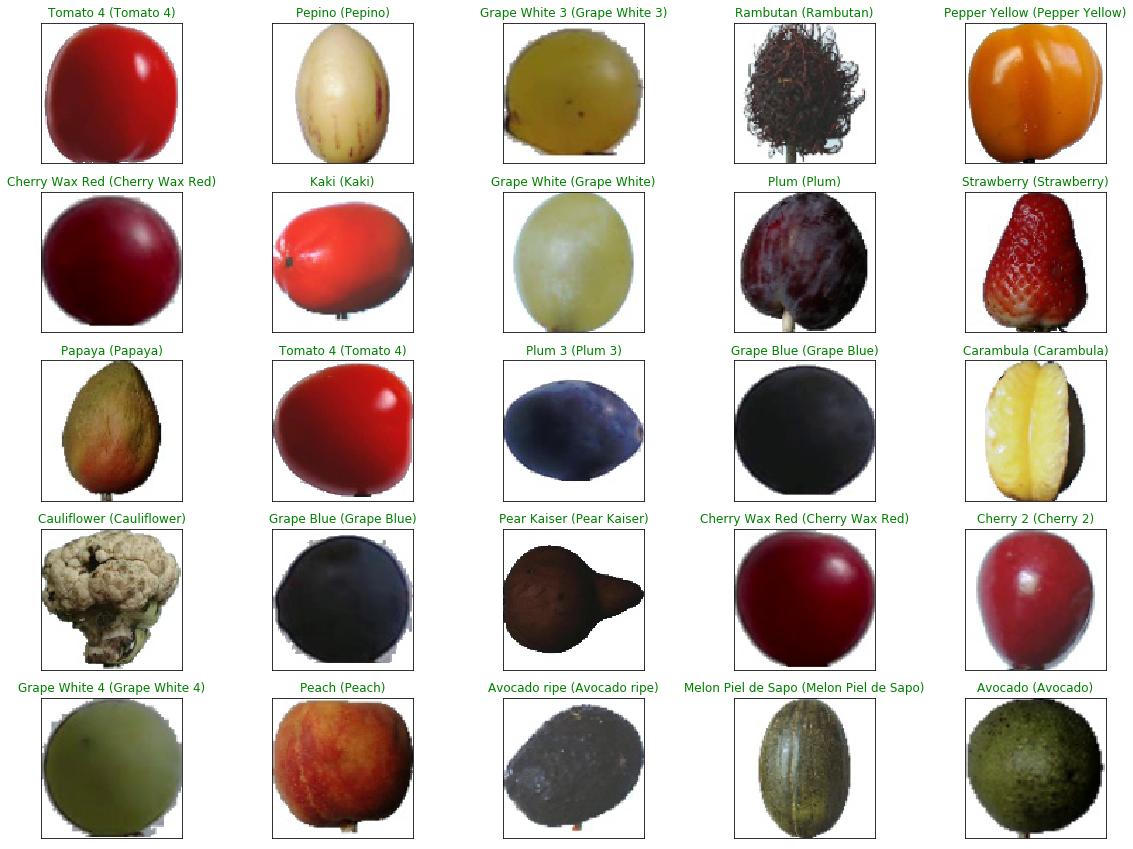

In [33]:
# using model to predict on test data
Y_pred = model.predict(X_test)

# Lets plot the predictions of different fruits and check their original labels

fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(Y_pred[idx])
    true_idx = np.argmax(Y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

Now, let us see how the loss function an accuracy changes as the model trains for 20 epochs

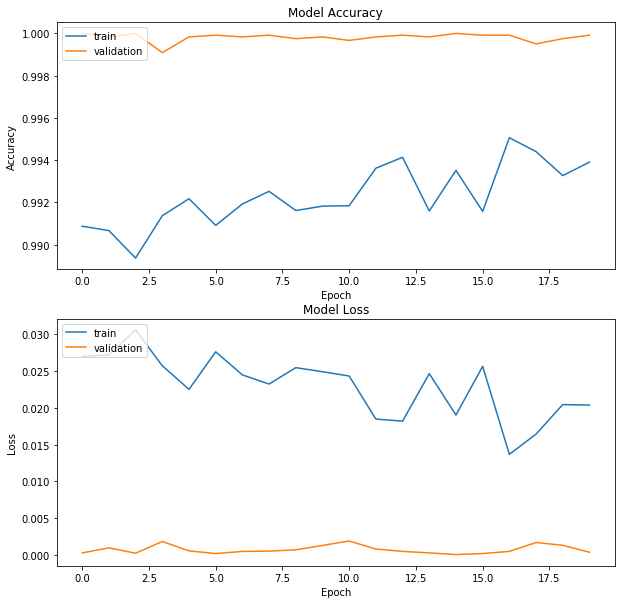

In [34]:
#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(CNN_model.history['acc'])  
plt.plot(CNN_model.history['val_acc'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(CNN_model.history['loss'])  
plt.plot(CNN_model.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

**Approach 2 **: **Using Transfer Learning for base layer and adding more convulutional and pooling layers**

In this approach, we will use transfer learning to prepare our base layer. **VGG16** is a neural network architecture that was trained on the **imagenet** dataset to classify 1000 different images and we will use the weights already trained on VGG16 for our approach 2



In [35]:
#importing vgg16

#Part 2 using transfer learning

#importing vgg16 architecture which is trained on Imagenet

from keras.applications.vgg16 import VGG16

vgg_model = VGG16(input_shape=[100,100,3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 2s 0us/step


We will freeze our base layer as we only want to train the layers which we are gonna add later.

In [0]:
#We will not train the layers imported.

for layer in vgg_model.layers:
   layer.trainable = False

In [37]:
#summary of the imported vgg model

vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

We will add one convolutional layers with 1024 filters to the vgg model follwed by a maxpooling and dense layers and fit the model on the fruits dataset and follow the same procedure as above.

In [40]:
#adding some layers to the vgg_model imported and again fitting the model to check the performance

transfer_learning_model = Sequential()
 
transfer_learning_model.add(vgg_model)


transfer_learning_model.add(Conv2D(1024, kernel_size=3, padding='same'))

transfer_learning_model.add(Activation('relu'))

transfer_learning_model.add(MaxPooling2D(pool_size=(2, 2)))
transfer_learning_model.add(Dropout(0.3))

transfer_learning_model.add(Flatten())
transfer_learning_model.add(Dense(150))
transfer_learning_model.add(Activation('relu'))
transfer_learning_model.add(Dropout(0.4))
transfer_learning_model.add(Dense(120,activation = 'softmax'))
transfer_learning_model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 1024)        4719616   
_________________________________________________________________
activation_3 (Activation)    (None, 3, 3, 1024)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 1024)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1, 1024)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)              

In [0]:
from keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
transfer_learning_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [43]:
#fitting the new model


checkpointer = ModelCheckpoint(filepath = 'transfer_learning.hdf5', verbose = 1, save_best_only = True)

# running 
transfer_learning_cnn = transfer_learning_model.fit(X_train,Y_train,
        batch_size = 128,
        epochs=20,
        validation_data=(X_val, Y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Train on 48398 samples, validate on 12100 samples
Epoch 1/20
 - 37s - loss: 1.6858 - acc: 0.5888 - val_loss: 0.1418 - val_acc: 0.9736

Epoch 00001: val_loss improved from inf to 0.14179, saving model to transfer_learning.hdf5
Epoch 2/20
 - 35s - loss: 0.2364 - acc: 0.9316 - val_loss: 0.0298 - val_acc: 0.9956

Epoch 00002: val_loss improved from 0.14179 to 0.02981, saving model to transfer_learning.hdf5
Epoch 3/20
 - 35s - loss: 0.1154 - acc: 0.9663 - val_loss: 0.0105 - val_acc: 0.9984

Epoch 00003: val_loss improved from 0.02981 to 0.01047, saving model to transfer_learning.hdf5
Epoch 4/20
 - 35s - loss: 0.0682 - acc: 0.9793 - val_loss: 0.0030 - val_acc: 0.9998

Epoch 00004: val_loss improved from 0.01047 to 0.00295, saving model to transfer_learning.hdf5
Epoch 5/20
 - 35s - loss: 0.0567 - acc: 0.9830 - val_loss: 0.0026 - val_acc: 0.9997

Epoch 00005: val_loss improved from 0.00295 to 0.00259, saving model to transfer_learning.hdf5
Epoch 6/20
 - 35s - loss: 0.0527 - acc: 0.9832 - val_l

In [0]:
transfer_learning_model.load_weights('transfer_learning.hdf5')


In [45]:
#score of the new model built using transfer learning

score = transfer_learning_model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

20622/20622 [==============================] - 14s 670us/step
Test accuracy: 0.9765299194861009


We can see that the accuracy decreased a bit but just image we din't even build a complex layer as we did in our 1st approach. We just used the weights from vgg16 and added 1 layer and even then the accuracy of ~0.98 is not bad.

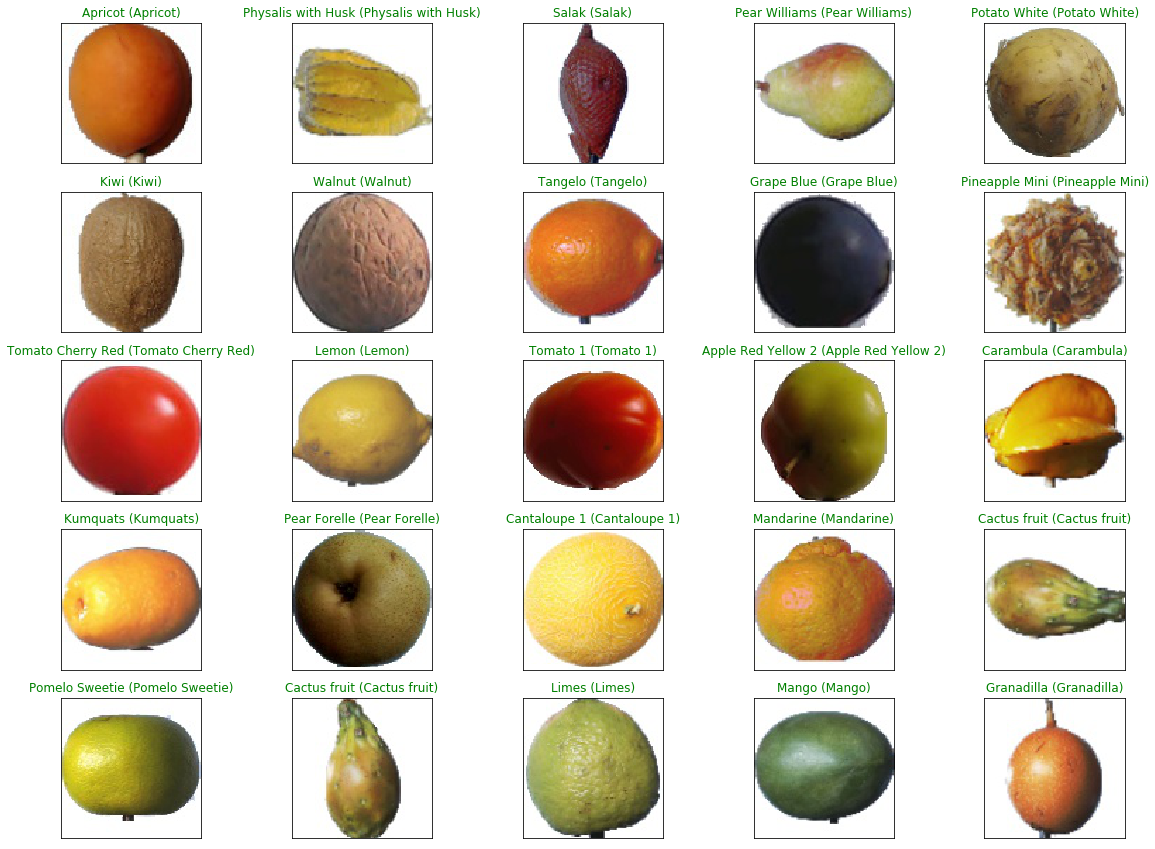

In [46]:
# using model to predict on test data
Y_pred = transfer_learning_model.predict(X_test)

fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(Y_pred[idx])
    true_idx = np.argmax(Y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

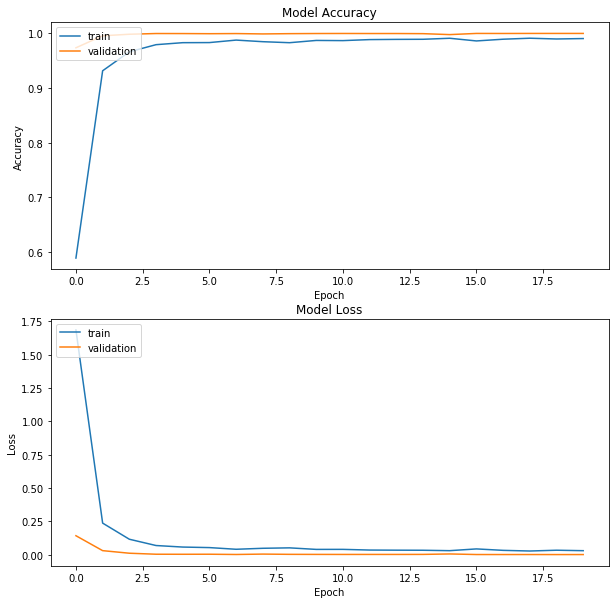

In [47]:
#plotting curves for the transfer learning model

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(transfer_learning_cnn.history['acc'])  
plt.plot(transfer_learning_cnn.history['val_acc'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(transfer_learning_cnn.history['loss'])  
plt.plot(transfer_learning_cnn.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

**What all more can be done to try improving accuracy in appproach 1 if we have great computational power ?**


1) **Data Augmentation** :- We can increase our training set by using augmentation techniques like rotating images, cropping images etc which can lead to a larger training set and hence may lead to a better accuracy.

2) **More complex layers** : We can try building a more complex layers like for example training all the vgg layers again which might lead to a better accuracy

3) **Hyperparameter tuning** : We can try using different regularization techniques suing a grid of parameters for momentum parameters, regularization parameters, rmsprop parameters, learning rates, etc which might lead to a better result.

4)**Number of epochs** : We can run for more number of epochs trying different batch sizes.
